## logistic regression 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'C:\\Users\\Win7Ult\Downloads\bank-full.csv',sep=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
#checking for null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
#applying label encoding for catagorial variables
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
df['job']= label_encoder.fit_transform(df['job'])
df['marital']= label_encoder.fit_transform(df['marital'])
df['education']= label_encoder.fit_transform(df['education'])
df['default']= label_encoder.fit_transform(df['default'])
df['housing']= label_encoder.fit_transform(df['housing'])
df['loan']= label_encoder.fit_transform(df['loan'])
df['contact']= label_encoder.fit_transform(df['contact'])
df['month']= label_encoder.fit_transform(df['month'])
df['poutcome']= label_encoder.fit_transform(df['poutcome'])
df['y']= label_encoder.fit_transform(df['y'])



In [6]:
#detecting anomalies by using isolation forest
from sklearn.ensemble import IsolationForest
ab=IsolationForest()
anomaly=ab.fit_predict(df)

In [7]:
t=pd.DataFrame(anomaly,columns=['anomaly'])
t

,anomaly
0,1
1,1
2,1
3,1
4,-1
...,...
45206,-1
45207,-1
45208,-1
45209,1


In [8]:
df1=pd.concat([df,t],axis=1)
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,anomaly
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,1
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,1
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,1
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,1
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,-1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,-1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,-1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,1


In [9]:
#droping the rows which has anomaliy value of -1
df2=df1.drop(df1[df1['anomaly']==-1].index.values)

In [10]:
x=df2.iloc[:,0:16]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45197,36,4,2,1,0,1511,1,0,0,16,9,270,1,-1,0,3
45198,37,4,1,2,0,1428,0,0,0,16,9,333,2,-1,0,3
45202,34,0,2,1,0,557,0,0,0,17,9,224,1,-1,0,3
45203,23,8,2,2,0,113,0,0,0,17,9,266,1,-1,0,3


In [11]:
y=df2.iloc[:,16]
y

0        0
1        0
2        0
3        0
5        0
        ..
45197    1
45198    0
45202    1
45203    1
45209    0
Name: y, Length: 35635, dtype: int32

In [12]:
df2['y'].value_counts()

0    34172
1     1463
Name: y, dtype: int64

In [13]:
#implementing random under sampling as the dataset is imbalance
from imblearn.under_sampling import RandomUnderSampler

In [14]:
ros=RandomUnderSampler(random_state=100)

In [15]:
x_ros,y_ros=ros.fit_resample(x,y)

In [16]:
x=x_ros.copy()
y=y_ros.copy()

In [17]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,52,7,1,1,0,145,0,0,0,22,1,205,4,-1,0,3
1,29,7,2,3,0,33,0,0,2,1,5,161,1,-1,0,3
2,33,9,1,1,0,2362,1,0,0,26,1,271,4,-1,0,3
3,41,1,1,1,0,1394,1,0,0,21,9,519,1,-1,0,3
4,34,9,1,1,1,91,0,0,0,29,1,67,4,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,29,4,2,2,0,765,0,0,0,16,9,238,1,-1,0,3
2922,25,8,2,1,0,358,0,0,0,16,9,330,1,-1,0,3
2923,36,4,2,1,0,1511,1,0,0,16,9,270,1,-1,0,3
2924,34,0,2,1,0,557,0,0,0,17,9,224,1,-1,0,3


In [18]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2921    1
2922    1
2923    1
2924    1
2925    1
Name: y, Length: 2926, dtype: int32

In [19]:
y.value_counts()

1    1463
0    1463
Name: y, dtype: int64

In [20]:
pd4=pd.concat([x,y],axis=1)
pd4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,52,7,1,1,0,145,0,0,0,22,1,205,4,-1,0,3,0
1,29,7,2,3,0,33,0,0,2,1,5,161,1,-1,0,3,0
2,33,9,1,1,0,2362,1,0,0,26,1,271,4,-1,0,3,0
3,41,1,1,1,0,1394,1,0,0,21,9,519,1,-1,0,3,0
4,34,9,1,1,1,91,0,0,0,29,1,67,4,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,29,4,2,2,0,765,0,0,0,16,9,238,1,-1,0,3,1
2922,25,8,2,1,0,358,0,0,0,16,9,330,1,-1,0,3,1
2923,36,4,2,1,0,1511,1,0,0,16,9,270,1,-1,0,3,1
2924,34,0,2,1,0,557,0,0,0,17,9,224,1,-1,0,3,1


In [21]:
import matplotlib.pyplot as plt

### dropping the outliers

In [22]:
pd5=pd4.drop(pd4[pd4['balance']>1720].index.values)
pd5

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,52,7,1,1,0,145,0,0,0,22,1,205,4,-1,0,3,0
1,29,7,2,3,0,33,0,0,2,1,5,161,1,-1,0,3,0
3,41,1,1,1,0,1394,1,0,0,21,9,519,1,-1,0,3,0
4,34,9,1,1,1,91,0,0,0,29,1,67,4,-1,0,3,0
5,51,4,2,2,0,0,1,0,2,30,8,164,2,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,29,4,2,2,0,765,0,0,0,16,9,238,1,-1,0,3,1
2922,25,8,2,1,0,358,0,0,0,16,9,330,1,-1,0,3,1
2923,36,4,2,1,0,1511,1,0,0,16,9,270,1,-1,0,3,1
2924,34,0,2,1,0,557,0,0,0,17,9,224,1,-1,0,3,1


In [23]:
pd5=pd5.drop(pd5[pd5['balance']<-950].index.values)

In [24]:
pd5=pd5.drop(pd5[pd5['duration']>820].index.values)

In [25]:
pd5=pd5.drop(pd5[pd5['age']>70].index.values)

In [26]:
pd5=pd5.drop(pd5[pd5['pdays']>0].index.values)

In [27]:
pd5=pd5.drop(pd5[pd5['default']>0.2].index.values)

In [28]:
x1=pd5.iloc[:,0:16]
x1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,52,7,1,1,0,145,0,0,0,22,1,205,4,-1,0,3
1,29,7,2,3,0,33,0,0,2,1,5,161,1,-1,0,3
3,41,1,1,1,0,1394,1,0,0,21,9,519,1,-1,0,3
5,51,4,2,2,0,0,1,0,2,30,8,164,2,-1,0,3
6,35,9,2,1,0,230,0,0,0,3,3,288,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,29,4,2,2,0,765,0,0,0,16,9,238,1,-1,0,3
2922,25,8,2,1,0,358,0,0,0,16,9,330,1,-1,0,3
2923,36,4,2,1,0,1511,1,0,0,16,9,270,1,-1,0,3
2924,34,0,2,1,0,557,0,0,0,17,9,224,1,-1,0,3


In [29]:
y1=pd5.iloc[:,16]
y1

0       0
1       0
3       0
5       0
6       0
       ..
2921    1
2922    1
2923    1
2924    1
2925    1
Name: y, Length: 2095, dtype: int32

In [30]:
x=x1.copy()
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,52,7,1,1,0,145,0,0,0,22,1,205,4,-1,0,3
1,29,7,2,3,0,33,0,0,2,1,5,161,1,-1,0,3
3,41,1,1,1,0,1394,1,0,0,21,9,519,1,-1,0,3
5,51,4,2,2,0,0,1,0,2,30,8,164,2,-1,0,3
6,35,9,2,1,0,230,0,0,0,3,3,288,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,29,4,2,2,0,765,0,0,0,16,9,238,1,-1,0,3
2922,25,8,2,1,0,358,0,0,0,16,9,330,1,-1,0,3
2923,36,4,2,1,0,1511,1,0,0,16,9,270,1,-1,0,3
2924,34,0,2,1,0,557,0,0,0,17,9,224,1,-1,0,3


In [31]:
y=y1.copy()
y

0       0
1       0
3       0
5       0
6       0
       ..
2921    1
2922    1
2923    1
2924    1
2925    1
Name: y, Length: 2095, dtype: int32

### LR

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\Win7Ult\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred = classifier.predict(x)

In [34]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(x)})

In [35]:
#y value and predicted y value
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
3,0,1
5,0,0
6,0,1
...,...,...
2921,1,1
2922,1,1
2923,1,1
2924,1,1


In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[841 236]
 [189 829]]


In [37]:
((1086+901)/(1086+254+246+901))*100

79.89545637314033

In [38]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1077
           1       0.78      0.81      0.80      1018

    accuracy                           0.80      2095
   macro avg       0.80      0.80      0.80      2095
weighted avg       0.80      0.80      0.80      2095



Text(0, 0.5, 'True Positive Rate')

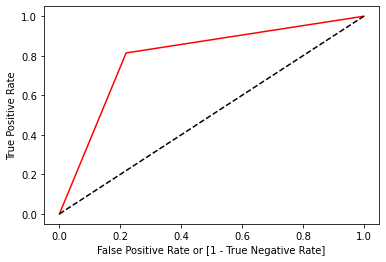

In [39]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y,y_pred)

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [40]:
auc.round(2)

0.8